# Eddy Kinetic Energy

This Jupyter notebook reproduces Figure 1 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". Eddy Kinetic Energy is defined as,

\begin{equation}
    \mathrm{EKE}(x,y) = \frac{1}{2}\rho_0\left(u'^2 + v'^2\right)
\end{equation}

Maps of EKE in Figure 1 of this study correspond to the the time-mean EKE:
\begin{equation}
    \overline{EKE}(x,y) = \overline{\frac{1}{2}\rho_0\left(u'^2 + v'^2\right)}
\end{equation}

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).


In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from utils import area, truncate_colormap, ccrs_land, add_patches

In [3]:
dataset_EKE = xr.open_dataset('./datasets/EKE_timeseries.nc')

In [4]:
grid_area = area(dataset_EKE.lat,dataset_EKE.lon)
rho=1025

Compute time-mean and load trends:

In [5]:
EKE = dataset_EKE.EKE

In [6]:
mean_EKE = (EKE.mean('time')*rho).sel(lat=slice(-60,60)) # Compute eddy kinetic energy density 

Import trends

In [7]:
dataset_trends = xr.open_dataset('./datasets/EKE_trends.nc')

In [8]:
trends = ( dataset_trends.trend * 10*365 ).sel(lat=slice(-60,60)) # Trends per day multiplied by 3650 days to report per decade.

Compute areas

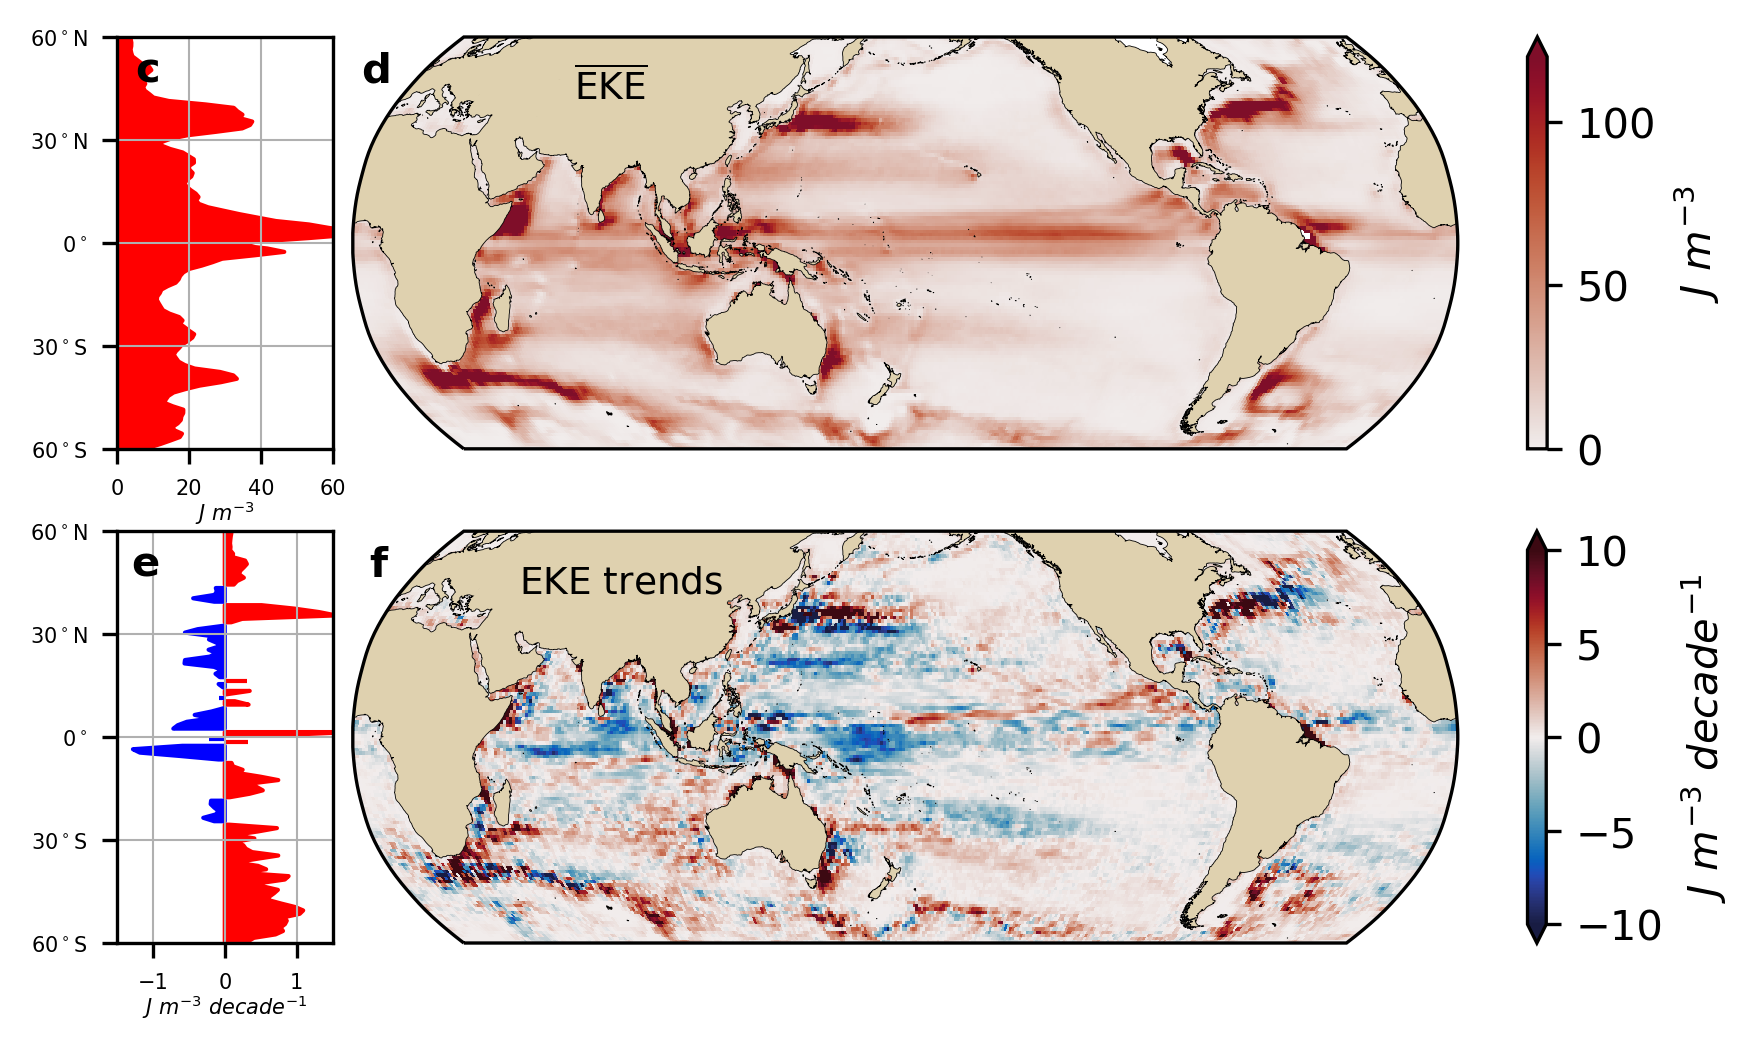

In [9]:
fig = plt.figure(dpi=300)

ax1 = fig.add_subplot(2, 1, 1, projection = ccrs.Robinson(central_longitude=180))

im = mean_EKE.plot(ax=ax1, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = truncate_colormap(cm.cm.amp, 0, 0.8), vmin = 0, vmax = 120)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land)
add_patches(ax1)

cb = plt.colorbar(im, orientation="vertical",extend='max')
cb.set_label(label="$J\ m^{-3}$")

ax_w1 = plt.axes([0, 0.537, 0.12, 0.343])

zonal_sum_tke=(mean_EKE.T).mean('lon')
zonal_sum_tke=zonal_sum_tke

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w1.fill_betweenx(zonal_sum_tke.lat, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w1.fill_betweenx(zonal_sum_tke.lat, neg, neg*0, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(0,60)
ax_w1.set_xlabel("$J\ m^{-3}$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.12)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(5,47,'c',fontweight='bold')
ax_w1.text(68,47,'d',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax2 = fig.add_subplot(2, 1, 2, projection = ccrs.Robinson(central_longitude=180))

im = trends.plot(transform=ccrs.PlateCarree(), add_colorbar=False,
              cmap=cm.cm.balance, vmin=-10, vmax=10,ax=ax2)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land)
add_patches(ax2)

cb = plt.colorbar(im, orientation="vertical",extend='both')
cb.set_label(label="$J\ m^{-3}\ decade^{-1}$")


ax_w2 = plt.axes([0.0, 0.125, 0.12, 0.343])

increase_tke_gw=(trends.mean('lon'))

pos=np.ma.masked_where(increase_tke_gw<0, increase_tke_gw)
ax_w2.fill_betweenx(trends.lat, pos*0 , pos, color='r')

neg=np.ma.masked_where(increase_tke_gw>0, increase_tke_gw)

ax_w2.fill_betweenx(trends.lat, neg, neg*0, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(-1.5,1.5)
ax_w2.set_xlabel("$J\ m^{-3}\ decade^{-1}$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.12)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(-1.3,47,'e',fontweight='bold')
ax_w2.text(2,47,'f',fontweight='bold')

ax1.text(0.20,0.85,r'$\overline{\mathrm{EKE}}$',fontsize=9,transform=ax1.transAxes);
ax2.text(0.15,0.85,r'$\mathrm{EKE}$ trends',fontsize=9,transform=ax2.transAxes);

**Figure 1 Sea Surface Height trend, mean surface Eddy Kinetic Energy and surface Eddy Kinetic Energy trend between 1993-2019.** (c) zonally averaged mean EKE; (d) map of mean EKE; (e) zonally averaged EKE trend; (f) map of EKE trend (55.4% of global area is significant above 95% confidence level). In panel (d), solid contours show positive EKE trends and dashed contours show negative EKE trends (contours of ±5 J m−3 decade−1).

*Note: Figure 1 a & b corresponds to the SSH trends from AVISO+ (See Methods).*